In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('default')

In [36]:
df1=pd.read_csv('./datasets/List of most-polluted cities by particulate matter concentration.csv')
df2=pd.read_csv('./datasets/company_sales_data.csv')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

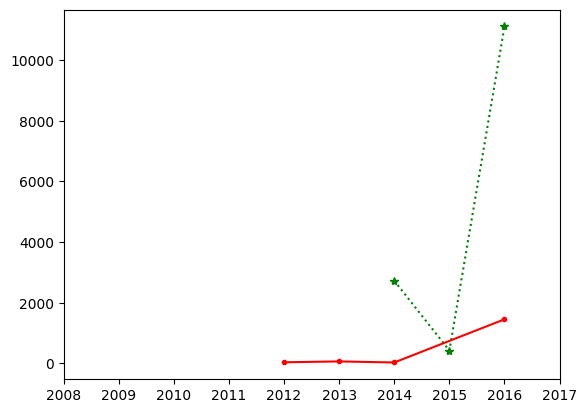

In [268]:
gr=df1[(df1['Country']=='China')].groupby('Year')
plt.plot(list(gr.groups.keys()),gr['PM2.5'].sum(),marker='*',linestyle='dotted',color='green')
gr=df1[(df1['Country']=='Iran')].groupby('Year')
plt.plot(list(gr.groups.keys()),gr['PM2.5'].sum(),marker='.',linestyle='-',color='red')
plt.xticks(df1['Year'].value_counts().index)
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

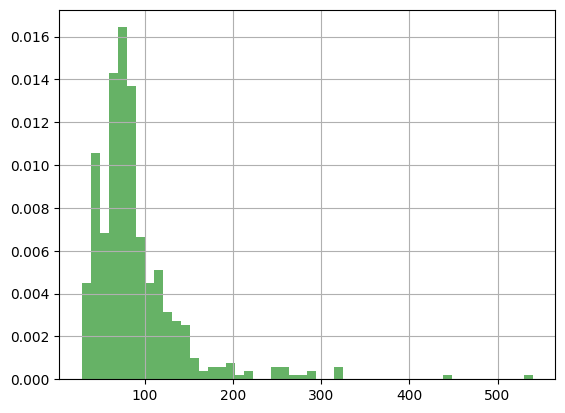

In [253]:
plt.hist(df1['PM10'],color='green',alpha=0.6,density=True,bins=50)
plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

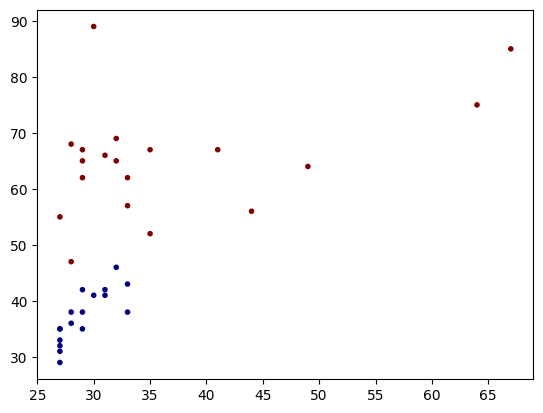

In [59]:
temp=df1[(df1['Country']=='Poland') | (df1['Country']=='Chile')]
plt.scatter(temp['PM2.5'],
         temp['PM10'],
         marker='.',c=temp['Country'].replace({'Poland':0,'Chile':1}),cmap='jet')

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

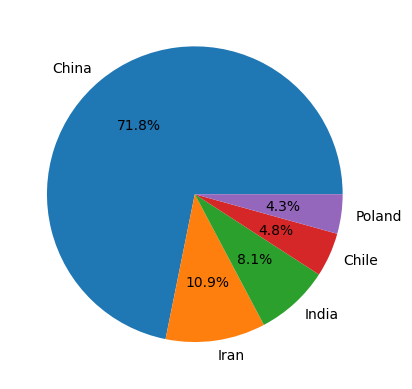

In [68]:
temp=df1['Country'].value_counts().head(5)
plt.pie(temp.values,labels=temp.index,autopct='%0.1f%%')
plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.



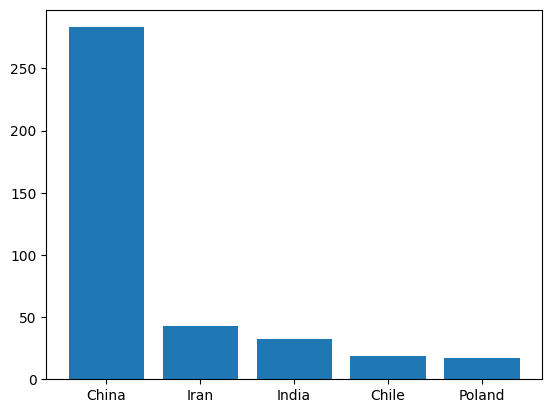

In [77]:
temp=df1['Country'].value_counts().head(5)
plt.bar(temp.index,temp.values)
plt.show()

##`Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


###`Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

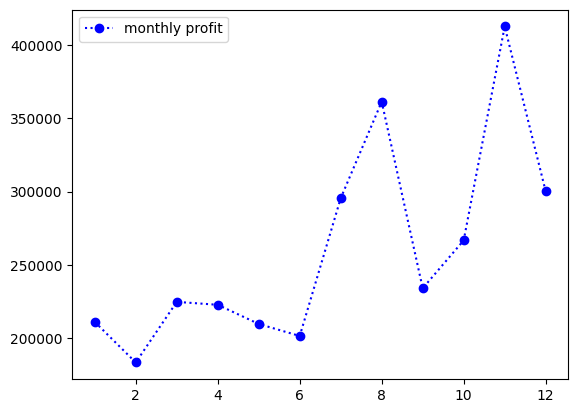

In [88]:
plt.plot(df2['month_number'],df2['total_profit'],linestyle='dotted',color='blue',marker='o',label='monthly profit')
plt.legend(loc='upper left')

###`Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

In [106]:
df2.iloc[2,1:-2]

facecream      2140
facewash       1340
toothpaste     4550
bathingsoap    9550
shampoo        3550
moisturizer    1340
Name: 2, dtype: int64

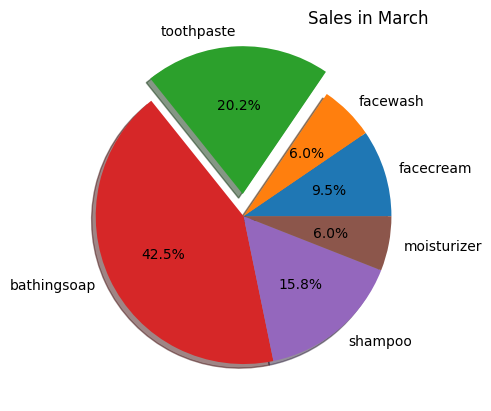

In [114]:
plt.pie(df2.iloc[2,1:-2],labels=df2.iloc[2,1:-2].index,autopct='%0.1f%%',explode=[0,0,0.15,0,0,0],shadow=True)
plt.title('Sales in March',loc='right')
plt.show()

###`Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

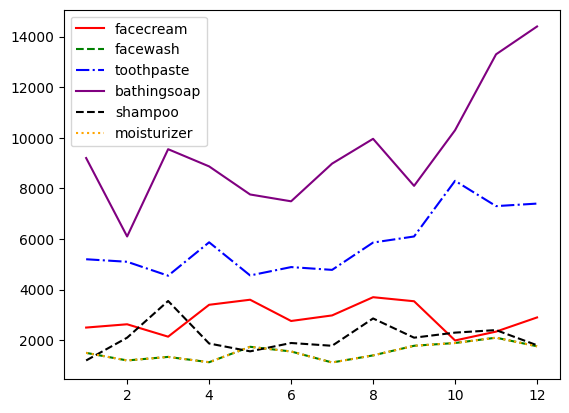

In [211]:
temp=df2.drop(columns=['quarter','total_units','total_profit']).set_index('month_number')
plt.plot(temp.index,temp.iloc[:,0],linestyle='-',color='red',label='facecream')
plt.plot(temp.index,temp.iloc[:,1],linestyle='--',color='green',label='facewash')
plt.plot(temp.index,temp.iloc[:,2],linestyle='-.',color='blue',label='toothpaste')
plt.plot(temp.index,temp.iloc[:,3],linestyle='-',color='purple',label='bathingsoap')
plt.plot(temp.index,temp.iloc[:,4],linestyle='--',color='black',label='shampoo')
plt.plot(temp.index,temp.iloc[:,5],linestyle='dotted',color='orange',label='moisturizer')
plt.legend()
    

###`Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


In [154]:
def quarter(mon):
    if mon>=1 and mon<=3:
        return 'q1'
    elif mon>=4 and mon<=6:
        return 'q2'
    elif mon>=7 and mon<=9:
        return 'q3'
    else:
        return 'q4'
df2['quarter']=df2['month_number'].apply(quarter)

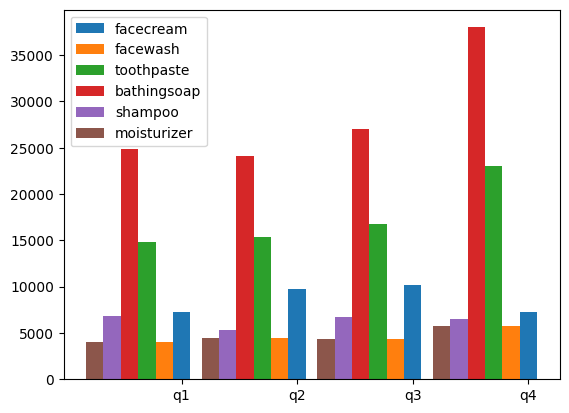

In [187]:
gr=df2.groupby('quarter').sum()
for i in range(6):
    plt.bar(np.arange(gr.shape[0])-(0.15*i),gr.iloc[:,i+1].values,width=0.15,label=gr.columns[i+1])
plt.xticks(ticks=[])
plt.xticks(ticks=[0,1,2,3],labels=gr.index)
plt.legend()

###`Problem-10` Plot Stacked Bar chart quarter wise for each product.

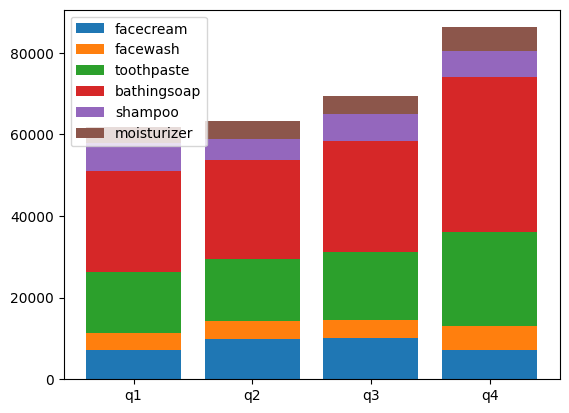

In [242]:
gr=df2.groupby('quarter').sum().iloc[:,1:-2]
for i in range(gr.shape[1]):
    plt.bar(gr.index,gr.iloc[:,i].values,bottom=gr.iloc[:,0:i].sum(axis=1),label=gr.columns[i])
plt.legend()